# Student score prediction by Linear Regression

In [1]:
#needed packages for the implementation
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

In [2]:
#reading the data
data = pd.read_csv('data.csv')
data

,time,score
0,4.508,19.202
1,0.096,7.734
2,3.133,13.811
3,7.909,53.018
4,7.811,55.299
...,...,...
95,3.561,19.128
96,0.301,5.609
97,7.163,41.444
98,0.309,12.027


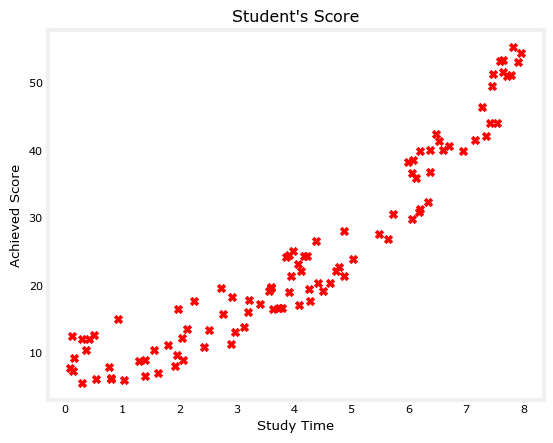

In [3]:
#plotting the data
plt.scatter(data.time, data.score, marker='X', c='r')
plt.title("Student's Score")
plt.xlabel('Study Time')
plt.ylabel('Achieved Score')
plt.show()

In [70]:
def gradient_descent(w, b, points):
    
    #learning rate
    L = 0.001
    
    #number of training examples
    m = len(points)
    
    #total steps to run namely total iteration
    steps = 1000
    
    while True:
        
        w_gradient = 0
        b_gradient = 0
        
        for i in range(m):
            x = points.iloc[i].time
            y = points.iloc[i].score
            
            w_gradient += (-2 / m) * x * (y - (w * x - b)) ** 2
            b_gradient += (-2 / m) * (y - (w * x - b)) ** 2
        
        #step size for w
        step_w = w_gradient * L
        w = w - step_w
        
        #step size for b
        step_b = b_gradient * L
        b = b - step_b
        
        steps -= 1
        
        #minimum step size is 0.001
        if steps == 0 or step_w < 0.0001 and step_b < 0.0001:
            break
            
    return w, b

In [75]:
w = 5
b = 0

w, b = gradient_descent(w, b, data)
w, b

(5.4582137560842, 0.08338069814000001)

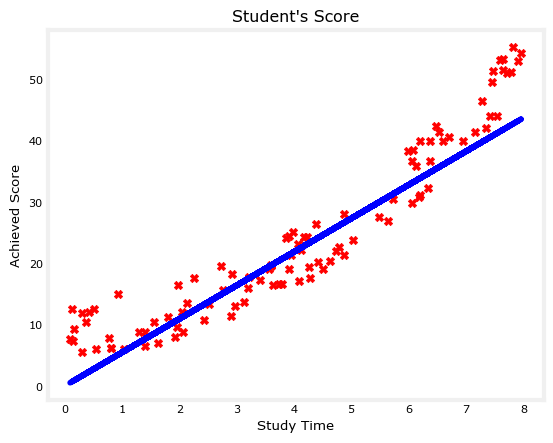

In [76]:
#plotting the data
plt.scatter(data.time, data.score, marker='X', c='r')
m = len(data)
y_hat = []
for i in range(m):
    y_hat.append((data.time[i] * w + b))

plt.plot(data.time, y_hat, c='b')

plt.title("Student's Score")
plt.xlabel('Study Time')
plt.ylabel('Achieved Score')
plt.show()